<a href="https://colab.research.google.com/github/m-oxu/ciencia_de_dados/blob/main/programas_e_projetos/regression_machine_learning/wine_quality_regression/modelagem_wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Carregando alguns módulos essenciais para trabalharmos os dados

#import modin.pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Previsão da qualidade final do vinho

O objetivo deste problema é prever qual é a qualidade final do vinho (nota) entre 0 e 10, com base em suas propriedades químicas! <p>
    
As bases de dados já estão separadas em treino e teste nos arquivos `wine_treino.csv` e `wine_teste.csv`.

Descrição das features na base:
- `type`: Tipo do vinho (Branco ou Tinto)
- `fixed acidity`: Acidez proveniente de ácidos que não evaporam rapidamente
- `volatile acidity`: Acidez proveniente de ácidos que evaporam rapidamente
- `citric acid`: Ácido cítrico presente no vinho, dá sensação de fescor
- `residual_sugar`: Açúcar da uva residual após fermentação
- `chlorides`: Quantidade de sais presentes no vinho
- `free sulfur dioxide`: Formas livres de SO2 presentes no vinho
- `total sulfur dioxide`: Formas livres e moleculares de SO2 presentes no vinho
- `pH`: pH (acidez) do vinho
- `sulphates`: Quantidade de sulfatos no vinho
- `alcohol`: Quantidade de álcool presente no vinho
- `quality`: Qualidade do vinho de 0 a 10. **É a nossa variável resposta!**

## Entendimento da base e dos tipos de dados

In [5]:
df = pd.read_csv('/content/winequalityN.csv')

In [ ]:
try:
    from janitor import clean_names
except:
    !pip install pyjanitor
    from janitor import clean_names
    
# Tira os espaços dos nomes das colunas
df = clean_names(df)

In [ ]:
df.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6487 non-null   float64
 2   volatile_acidity      6489 non-null   float64
 3   citric_acid           6494 non-null   float64
 4   residual_sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   ph                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## EDA (Exploratory Data Analysis)

In [7]:
# transformando as variáveis em categóricas
df.type = pd.get_dummies(df.type)
df.type = df.type.astype('category')

In [ ]:
missing_values = df.isnull().sum()
percentage = round((df.isnull().sum()/len(df.values)*100), 2)

percentage_of_missing_values = pd.DataFrame({'missing': missing_values,
                                             'percentage': percentage})

# Apresenta a porcentagem de valores faltantes como uma tabela
percentage_of_missing_values

,missing,percentage
type,0,0.00
fixed_acidity,10,0.15
volatile_acidity,8,0.12
citric_acid,3,0.05
residual_sugar,2,0.03
chlorides,2,0.03
free_sulfur_dioxide,0,0.00
total_sulfur_dioxide,0,0.00
density,0,0.00
ph,9,0.14


A tabela acima demonstra que não há uma significância de valores faltantes na tabela. Em nenhuma coluna o valor de missings ultrapassa 1%. Vamos então retirar os missings.

In [ ]:
# Retira todos os valores faltantes
df = df.dropna(axis=0)

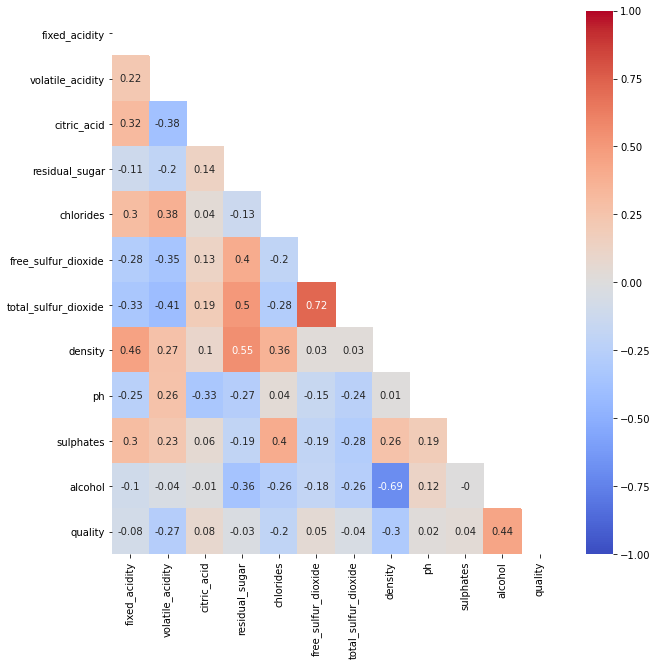

In [ ]:
# Mapa de calor para analisar a correlação entre as variáveis
# e a variável 'quality'

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr().round(2), 
            annot=True, 
            vmin=-1, 
            vmax=1, 
            cmap='coolwarm',
            mask=np.triu(np.ones_like(df.corr())))

Pelo heatmap podemos observar que as correlaçẽs existentes não são muito altas. As que se destacam são as variáveis 'alcohol', 'volatile_acidity' e 'density'. Isto é, qualquer variável maior que 10% negativos ou positivos.

In [ ]:
# Importando algoritmo de regressão linear e de repartição do dataset

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Importando métrica para verificarmos o quão bem nosso modelo está indo.
from sklearn.metrics import mean_squared_error, r2_score

##Modelagem dos dados

In [ ]:
modelo_linear = LinearRegression()

# Definindo as variáveis x e y

y = df[['quality']]
x = df.drop('quality', axis=1)

# Dividindo o dataset em treino e teste, com o teste sendo 20% do total dos dados.
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=1000)

In [ ]:
# Treinando o modelo
modelo_linear.fit(x_train, y_train)

# Testando o modelo
predict = modelo_linear.predict(x_test)

# Tirando a raiz quadrada do MSE para transformá-lo em RMSE
root_mean_squared_error_all = np.sqrt(mean_squared_error(y_test, predict))

## Avaliação das métricas

In [ ]:
# Métricas para avaliar performance das previsões. Quanto menor melhor!
print(f'O Root Mean Squared Error de nosso modelo é de {round(np.sqrt(mean_squared_error(y_test, predict)), 4)}.')

# Quanto mais próximo de 1, melhor!
print(f'O R2 Score do nosso modelo é de {round(r2_score(y_test, predict), 4)}.')

O Root Mean Squared Error de nosso modelo é de 0.7172.
O R2 Score do nosso modelo é de 0.3187.


Nós podemos melhorar essas métricas utilizando outros tipos de algoritmos? 
 R: Sim! Mas, precisamos testá-los. Um R2 Score de 0.3 é muito ruim, e um RSME de 0.71 também!

#Previsão da cor do vinho utilizando regressão logística

##Dataset divido normalmente

In [3]:
# Logistic Regression algorithm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report
from sklearn.model_selection import train_test_split
modelo_logistic = LogisticRegression()

In [12]:
# transformando as variáveis em categóricas
df.type = pd.get_dummies(df.type)
df.type = df.type.astype('category')

In [11]:
df = df.dropna(axis=0)

In [13]:
# Redefinindo x e y
y = df[['type']]
x = df.drop('type', axis=1)

# Dividindo o dataset em treino e teste novamente
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=5000)

In [14]:
# Modelagem com algoritmo de regressão logística
treinando_modelo_1 = modelo_logistic.fit(x_train, y_train)
testando_modelo_1 = modelo_logistic.predict(x_test)

In [15]:
# Saber como o algoritmo se saiu
print(classification_report(y_test, testando_modelo_1))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       310
           1       0.98      0.98      0.98       983

    accuracy                           0.98      1293
   macro avg       0.97      0.97      0.97      1293
weighted avg       0.98      0.98      0.98      1293



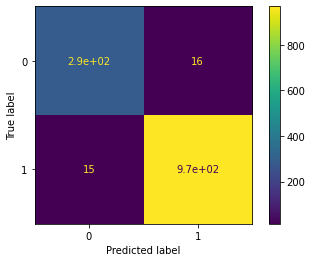

In [16]:
plot_confusion_matrix(modelo_logistic, x_test, y_test)

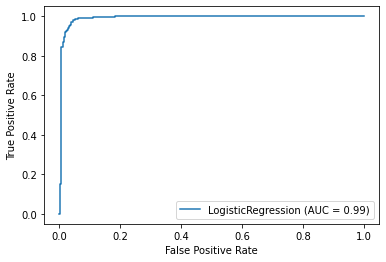

In [17]:
plot_roc_curve(modelo_logistic, x_test, y_test)

Com esses resultados e com essas métricas podemos interpretar que o modelo soube prever muito bem a cor do vinho. Bem até demais. Vamos modificar o dataset um pouco e retreiná-lo.

##Dataset redividido

In [ ]:
# Separando o dataset original e retirando 80% dele para nosso modelo
df_treino = pd.read_csv('/content/wine_treino.csv')
df_teste = pd.read_csv('/content/wine_teste.csv')

In [42]:
df_maior_1 = df.loc[(df.type == 1)][:3896]
df_maior_0 = df.loc[df.type == 0][:1275]
df_maior = pd.concat([df_maior_0, df_maior_1], ignore_index=True)

df_menor_1 = df.loc[(df.type == 1)][3896:]
df_menor_0 = df.loc[df.type == 0][1275:]
df_menor = pd.concat([df_menor_0, df_menor_1], ignore_index=True)

In [41]:
df_maior.type.value_counts()

1    3896
0    1275
Name: type, dtype: int64

In [43]:
df_menor.type.value_counts()

1    974
0    318
Name: type, dtype: int64

Agora, vamos treinar o nosso modelo com o dataset maior e testar com o dataset menor.

In [45]:
# Dados de treino do dataset maior
y = df_maior[['type']]
x = df_maior.drop('type', axis=1)

# Dados de teste do dataset menor
y_teste_dataset = df_menor.type
x_teste_dataset = df_menor.drop('type', axis=1)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=10000)

In [47]:
treinando_segundo_modelo = modelo_logistic.fit(x_train, y_train)
testando_segundo_modelo = modelo_logistic.predict(x_teste_dataset)

In [48]:
print(classification_report(y_teste_dataset, testando_segundo_modelo))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       318
           1       0.98      0.99      0.99       974

    accuracy                           0.98      1292
   macro avg       0.98      0.97      0.97      1292
weighted avg       0.98      0.98      0.98      1292



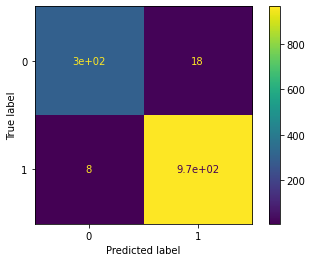

In [49]:
plot_confusion_matrix(modelo_logistic, x_teste_dataset, y_teste_dataset)

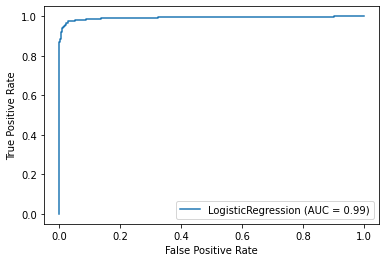

In [ ]:
plot_roc_curve(modelo_logistic, x_teste_dataset, y_teste_dataset)

#Regressão Logística na Quality

In [144]:
# Pegando valores iguais ou acima de seis, e valores iguais e abaixo de 5.
# A intenção é binarizar a qualidade dos vinhos e aplicar uma regressão logística.

df_mod_0 = df.loc[df.quality >= 6][:3000] # balanceando um pouco o dataset
df_mod_1 = df.loc[df.quality <= 5]

In [145]:
# Transformando em dados binários
df_mod_1.quality = 1
df_mod_0.quality = 0

In [146]:
#Juntando os dois datasets em um
df_quality = pd.concat([df_mod_0, df_mod_1], ignore_index=True)

In [147]:
# Distribuição dos dados
df_quality.quality.value_counts()

0    3000
1    2372
Name: quality, dtype: int64

In [148]:
y = df_quality[['quality']]
x = df_quality.drop('quality', axis=1)

# Dividindo o dataset em treino e teste novamente
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=5000)

In [149]:
# Modelagem com algoritmo de regressão logística
treinando_modelo = modelo_logistic.fit(x_train, y_train)
testando_modelo = modelo_logistic.predict(x_test)

In [150]:
print(classification_report(y_test, testando_modelo))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       604
           1       0.79      0.61      0.69       471

    accuracy                           0.76      1075
   macro avg       0.77      0.74      0.75      1075
weighted avg       0.76      0.76      0.75      1075



Basicamente, conseguimos acertar 75% do nosso dataset. 87% dos vinhos de qualidade, e 61% dos vinhos sem qualidade.

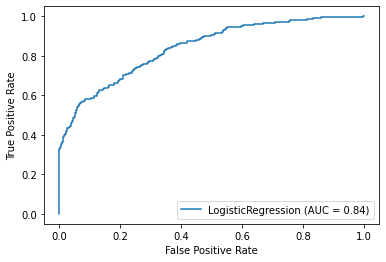

In [151]:
plot_roc_curve(modelo_logistic, x_test, y_test)